# LOAD Modules

In [7]:
%matplotlib inline
#%matplotlib widget
%load_ext autoreload
%autoreload 2


import numpy as np
from visualisations import eeg_sample_plot, events_distribution_plot, curve_name_gen
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor
from torch.utils.data import DataLoader
from datasets import ChannelsVoltageDataset
from neural_nets.nn_models_getter import get_nn_model
from optimizers import get_optimizer
from utils_train import fit, test, plot_all_metrics, plot_val_metrics, final_test_acc
from configs import configs_ozhan, configs_tim, configs_joaquin
from data_loader_creation import get_dataloader_objects
from classification_results import results_storer



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Select the configuration

In [8]:
""" USER: SELECT THE CONFIGURATION YOU NEED """
#myList = configs_tim.list_of_configs
#myList = configs_joaquin.list_of_configs
myList = configs_ozhan.list_of_configs

# Train

ConvNetOzhan_Adam 
-------------------------

We are not on the cluster...

Data is being loaded using MNE...


100%|██████████| 4/4 [00:29<00:00,  7.33s/it]


5400 matching events found
No baseline correction applied
...data loading with MNE was finished. 

810  time samples and  64  EEG channels for one epoch are taken.  Total epoch number is  5400  and there are  30  subjects included.
 There are in total  8  classes for classification.

Data is being augmented with gaussian noise...


100%|██████████| 4374/4374 [00:08<00:00, 543.25it/s]


...augmentation with gaussian noise is finished. 

cuda will be used for training of this model.
You have 2 GPUs for training!
Learning Rate:  0.001 

-> Epoch 1/25: train_loss: 2.0669, train_accuracy: 15.4664%, val_loss: 2.0416, val_accuracy: 17.6955%
-> Epoch 2/25: train_loss: 2.0111, train_accuracy: 21.0905%, val_loss: 1.9903, val_accuracy: 22.0165%
-> Epoch 3/25: train_loss: 1.9483, train_accuracy: 26.9319%, val_loss: 1.9383, val_accuracy: 29.8354%
-> Epoch 4/25: train_loss: 1.8969, train_accuracy: 34.5679%, val_loss: 1.8999, val_accuracy: 35.1852%
-> Epoch 5/25: train_loss: 1.8531, train_accuracy: 36.5569%, val_loss: 1.8792, val_accuracy: 35.3909%
-> Epoch 6/25: train_loss: 1.8287, train_accuracy: 38.6260%, val_loss: 1.8729, val_accuracy: 33.5391%
-> Epoch 7/25: train_loss: 1.8173, train_accuracy: 39.4033%, val_loss: 1.8646, val_accuracy: 35.3909%
-> Epoch 8/25: train_loss: 1.8079, train_accuracy: 40.0663%, val_loss: 1.8600, val_accuracy: 32.5103%
-> Epoch 9/25: train_loss: 1.8012

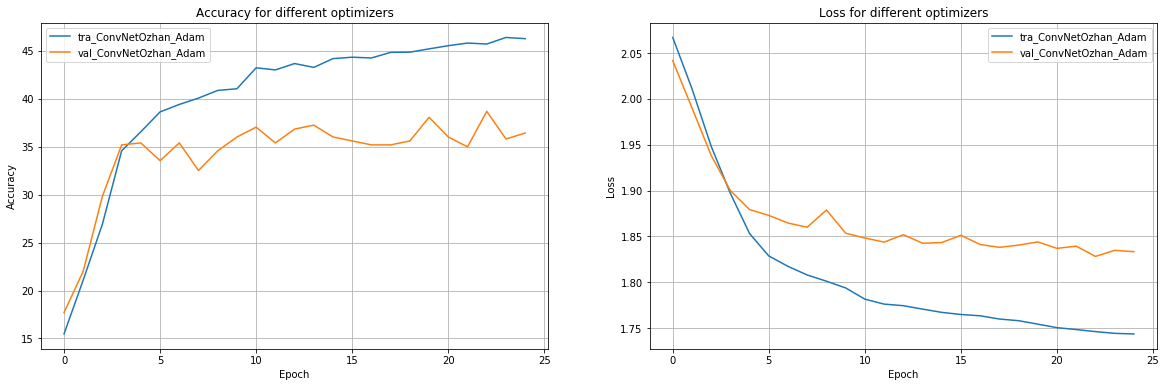

In [9]:
training_curves = {}

for my_cfg in myList:
    
    curve_name_gen(my_cfg)
    
    """ PREPARE DATALOADERS """
    train_dl, val_dl, test_dl, input_dimension_, output_dimension_ = get_dataloader_objects(my_cfg)


    """CLASSIFICATION"""
    # Get the model
    model_untrained = get_nn_model(my_cfg, input_dimension=input_dimension_,output_dimension=output_dimension_)

    # Get the optimizer
    optimizer = get_optimizer(my_cfg, model_untrained.parameters())

    # Train and show validation loss
    train_losses, train_accuracies, val_losses, val_accuracies, model_trained, time_spent_for_training_s =\
        fit(train_dl, val_dl, model_untrained, optimizer, my_cfg)
    
    curves = train_losses, train_accuracies, val_losses, val_accuracies, model_trained, time_spent_for_training_s
    training_curves[my_cfg.curve_name] = curves
    
    # Report final accuracy
    test_loss, test_accuracy =  final_test_acc(model_trained, test_dl, my_cfg)


    # Store the results
    results_storer.store_results_for_plot(my_cfg,test_loss, test_accuracy, train_losses,
                                 train_accuracies, time_spent_for_training_s, val_losses, val_accuracies)

    results_storer.store_results(my_cfg, model_trained, optimizer, test_loss, test_accuracy, train_losses,
                                 train_accuracies, time_spent_for_training_s, val_losses, val_accuracies, test_dl)


plot_all_metrics(training_curves)